In [6]:
import pandas as pd

import numpy as np

from warnings import filterwarnings
filterwarnings("ignore")

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from scipy.stats import shapiro

from scipy.stats import levene

from scipy.stats import f_oneway

from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split , GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier


In [7]:
df = pd.read_csv('hospital_readmissions.csv')

In [8]:
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


#### Basic Analysis

In [9]:
print(f' the number of rows = {df.shape[0]} and the number of columns = {df.shape[1]}')

 the number of rows = 25000 and the number of columns = 17


#### Size

In [10]:
df.size

425000

#### Duplicates

In [11]:
df.duplicated().any()

False

#### Data types

In [12]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [14]:
# checking for null values
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [15]:
#summary of integer features
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [16]:
#checking for duplicate values
df.duplicated().sum()

0

In [17]:
# dropping dulpicate values
df.drop_duplicates(inplace = True)

In [18]:
df.time_in_hospital.describe()

count    25000.00000
mean         4.45332
std          3.00147
min          1.00000
25%          2.00000
50%          4.00000
75%          6.00000
max         14.00000
Name: time_in_hospital, dtype: float64

In [19]:
df.time_in_hospital.value_counts()

time_in_hospital
3     4311
2     3986
1     3480
4     3467
5     2542
6     1895
7     1467
8     1104
9      768
10     588
11     458
12     354
13     299
14     281
Name: count, dtype: int64

In [20]:
df.n_lab_procedures.describe()

count    25000.00000
mean        43.24076
std         19.81862
min          1.00000
25%         31.00000
50%         44.00000
75%         57.00000
max        113.00000
Name: n_lab_procedures, dtype: float64

In [21]:
df.n_procedures.describe()

count    25000.000000
mean         1.352360
std          1.715179
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: n_procedures, dtype: float64

In [22]:
df.n_medications.describe()

count    25000.000000
mean        16.252400
std          8.060532
min          1.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         79.000000
Name: n_medications, dtype: float64

In [23]:
df.n_outpatient.describe()

count    25000.000000
mean         0.366400
std          1.195478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: n_outpatient, dtype: float64

In [24]:
df.n_inpatient.describe()

count    25000.000000
mean         0.615960
std          1.177951
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         15.000000
Name: n_inpatient, dtype: float64

In [25]:
df.n_emergency.describe()

count    25000.000000
mean         0.186600
std          0.885873
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         64.000000
Name: n_emergency, dtype: float64

In [26]:
df.medical_specialty.describe()

count       25000
unique          7
top       Missing
freq        12382
Name: medical_specialty, dtype: object

In [27]:
df.diag_1.describe()

count           25000
unique              8
top       Circulatory
freq             7824
Name: diag_1, dtype: object

In [28]:
df.diag_2.describe()

count     25000
unique        8
top       Other
freq       9056
Name: diag_2, dtype: object

In [29]:
df.diag_3.describe()

count     25000
unique        8
top       Other
freq       9107
Name: diag_3, dtype: object

In [30]:
df.glucose_test.describe()

count     25000
unique        3
top          no
freq      23625
Name: glucose_test, dtype: object

In [31]:
df.A1Ctest.describe()

count     25000
unique        3
top          no
freq      20938
Name: A1Ctest, dtype: object

In [32]:
df.change.describe()

count     25000
unique        2
top          no
freq      13497
Name: change, dtype: object

In [33]:
df.diabetes_med.describe()

count     25000
unique        2
top         yes
freq      19228
Name: diabetes_med, dtype: object

In [34]:
df.readmitted.describe()

count     25000
unique        2
top          no
freq      13246
Name: readmitted, dtype: object

In [35]:
df.readmitted.value_counts()

readmitted
no     13246
yes    11754
Name: count, dtype: int64

#### VISUALIZATION 
#### UNIVARIATE 

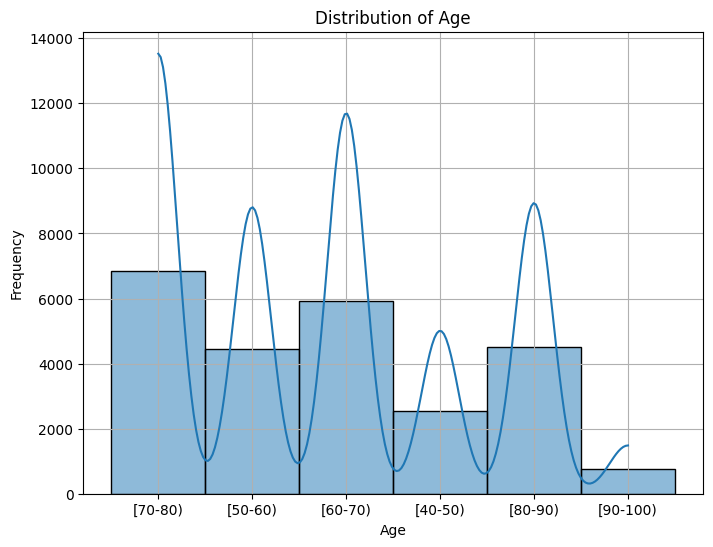

In [36]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
# we can see that there are more number of patients are admitted in 70-80.

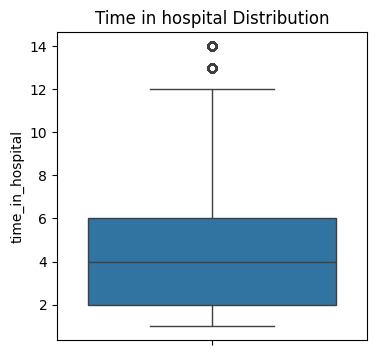

In [38]:
#checking for outliers
plt.figure(figsize=(4,4))
sns.boxplot(df['time_in_hospital'])
plt.title('Time in hospital Distribution')
plt.show()

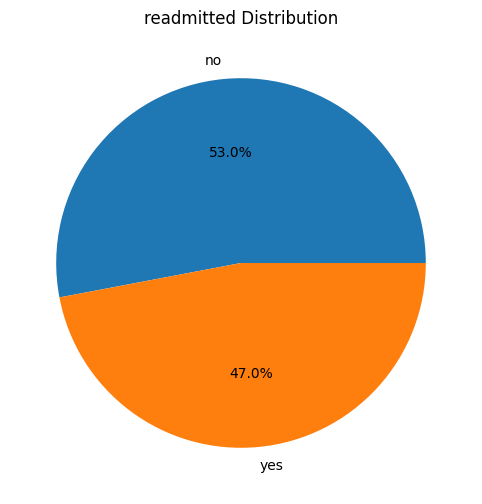

In [39]:
# Pie chart for Credit Mix
plt.figure(figsize=(8, 6))
df['readmitted'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('readmitted Distribution')
plt.ylabel('')
plt.show()

In [40]:
# Here we can see that 47% are admitted and 53% are under not admitted categories.

In [41]:
# Outliers Treatments

In [42]:
# Remove outliers
Q1 = df.select_dtypes(np.number).quantile(0.25)
Q3 = df.select_dtypes(np.number).quantile(0.75)
IQR = Q3 - Q1

In [43]:
df[~((df.select_dtypes(np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,[60-70),2,61,4,11,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,no
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


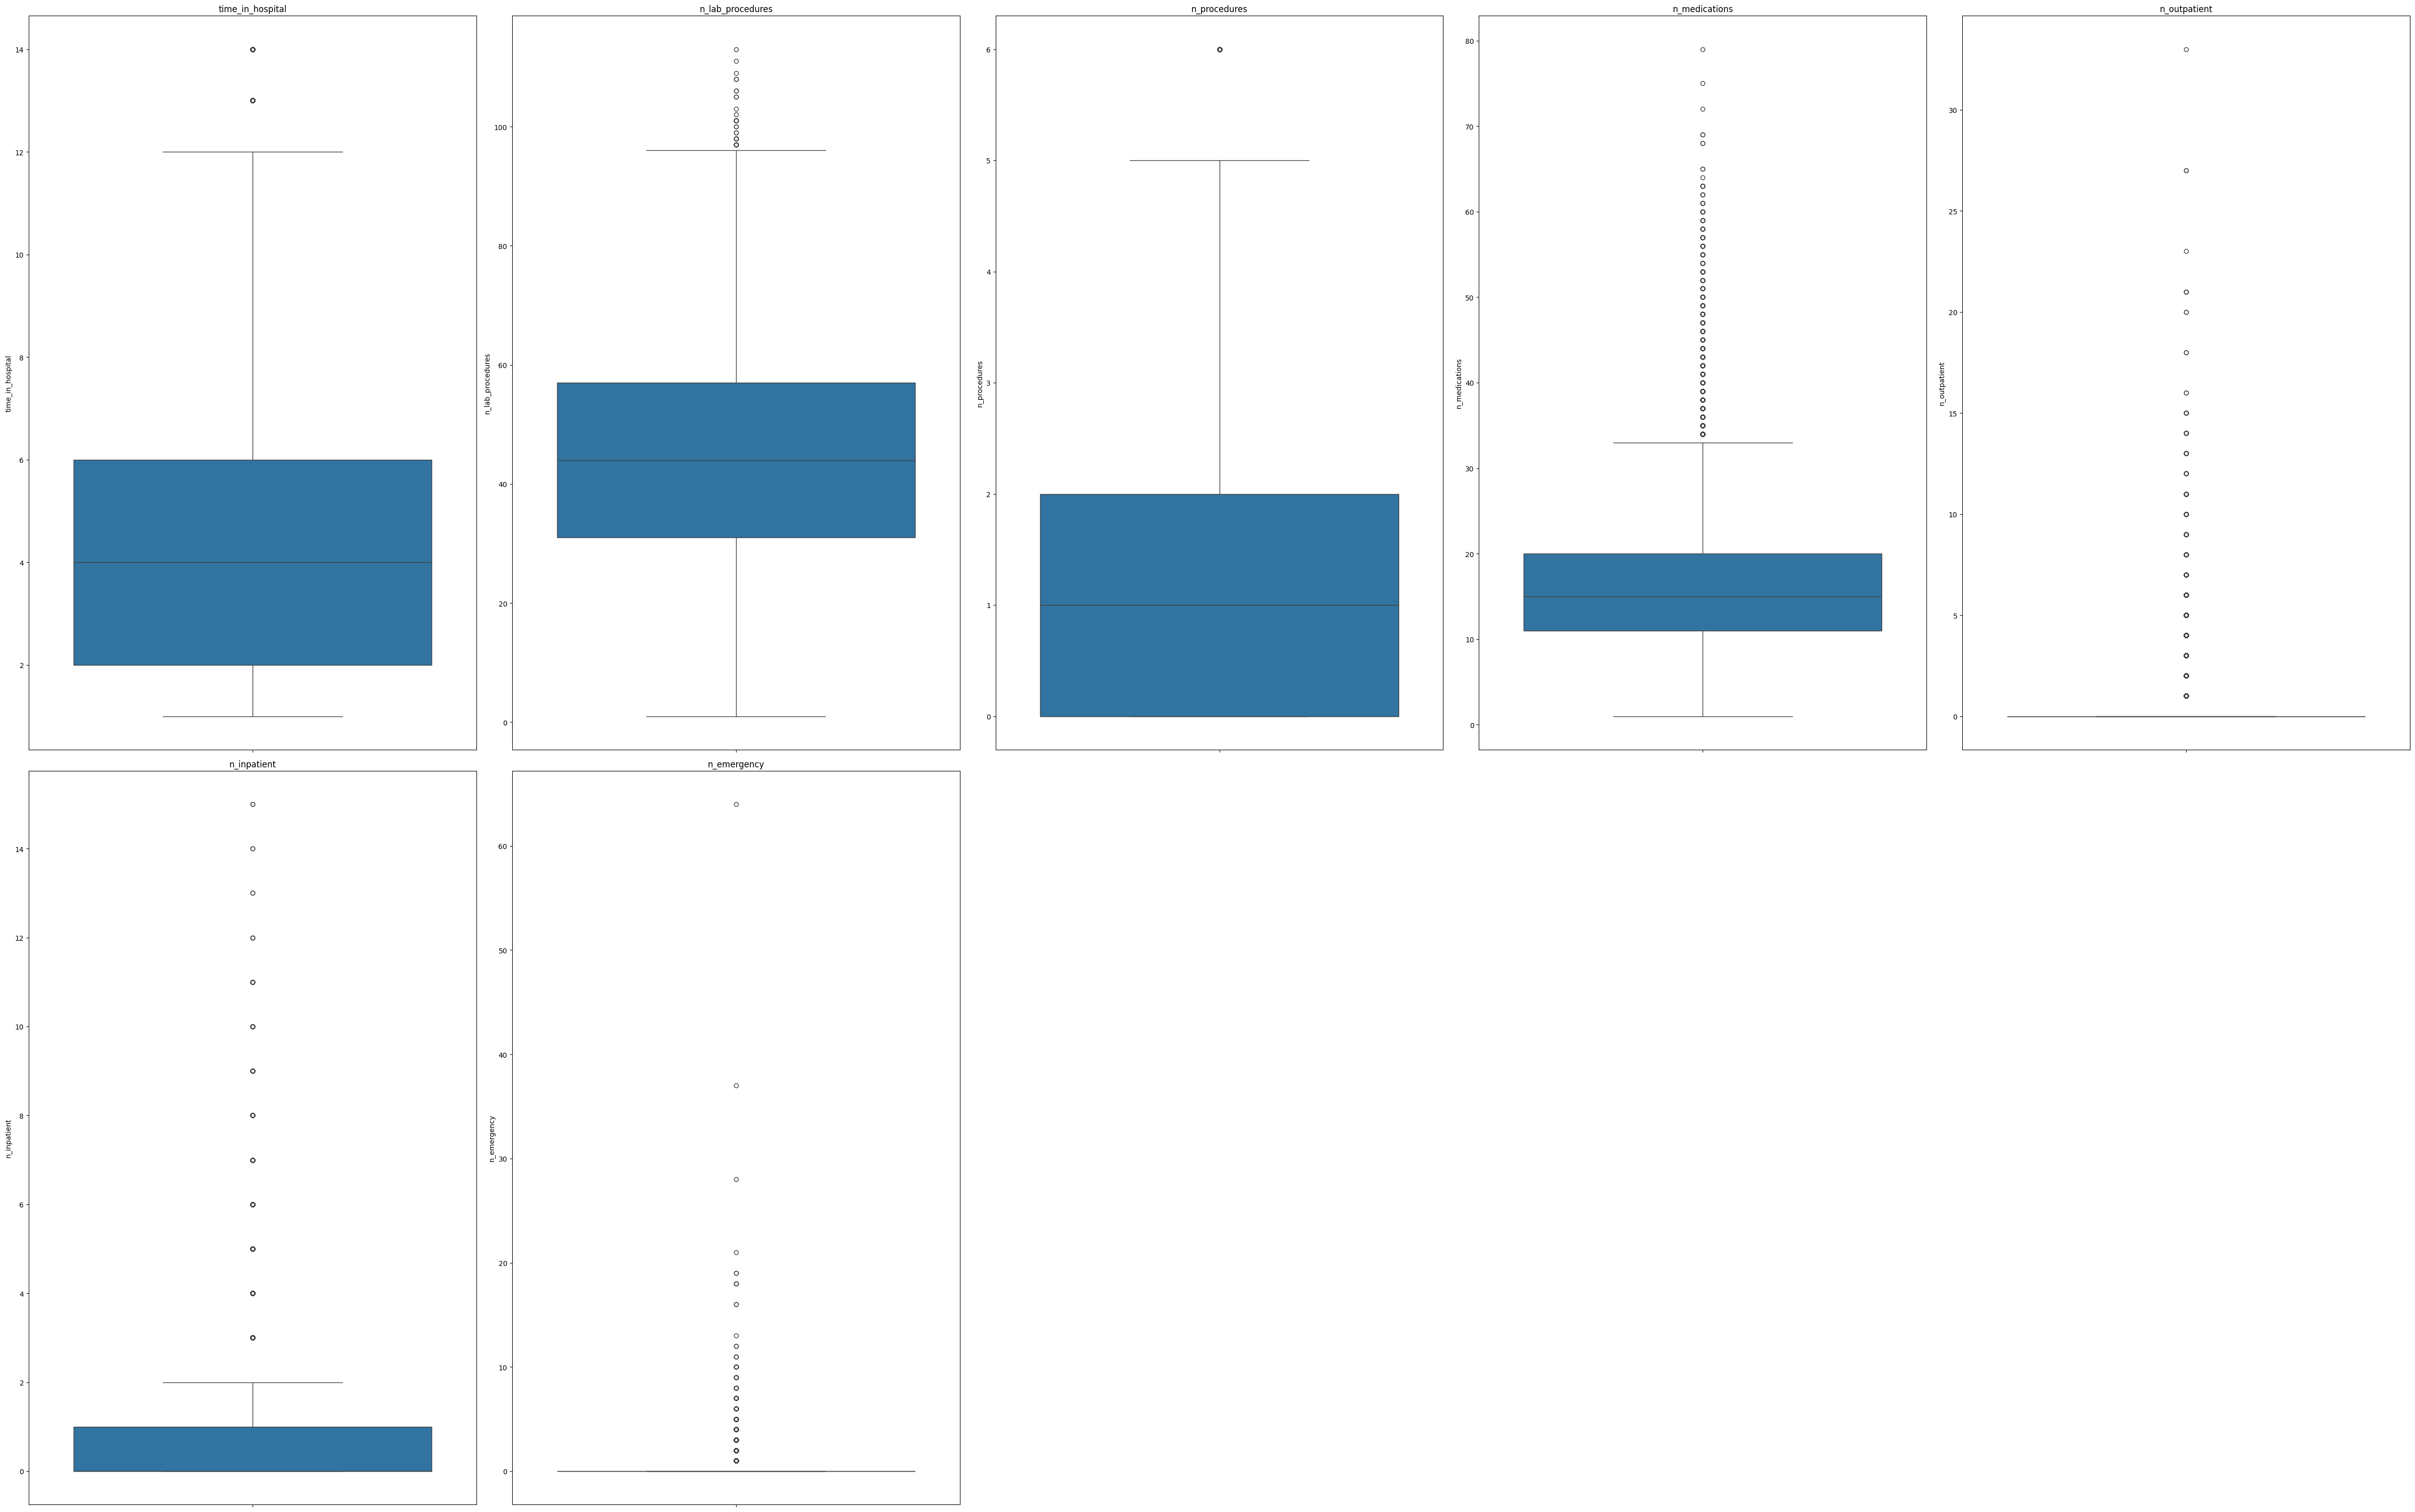

In [44]:
# box plot for all numberical columns for Visualize the outliers
plt.figure(figsize= [48,60])
t = 1
for i in df.select_dtypes(np.number).columns:
    plt.subplot(4 , 5,t)
    sns.boxplot(df[i])
    plt.title(i)
    t = t + 1
plt.tight_layout()
plt.savefig('box plot for numerical variables.png')
plt.show()

In [45]:
# Statistical Analysis 

In [46]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [47]:
df.describe(include= 'object')

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246


In [48]:
# Skewness

In [49]:
df.skew(numeric_only=True)

time_in_hospital     1.108905
n_lab_procedures    -0.238672
n_procedures         1.300572
n_medications        1.316139
n_outpatient         7.302605
n_inpatient          3.254634
n_emergency         24.530152
dtype: float64

In [50]:
# Kurtosis

In [51]:
df.kurtosis(numeric_only=True)

time_in_hospital       0.800598
n_lab_procedures      -0.297922
n_procedures           0.795567
n_medications          3.476595
n_outpatient          95.925322
n_inpatient           16.454233
n_emergency         1310.593302
dtype: float64

In [52]:
# Hypothesis Testing

In [53]:
# Normality testing
shapiro_results = {}

# Loop through columns and perform Shapiro test for float and integer columns
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        _, p_value = shapiro(df[col])
        shapiro_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the Shapiro test results and make inferences
for col, p_value in shapiro_results.items():
    if p_value < alpha:
        print(f"Shapiro test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Shapiro test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Shapiro test p-value for column 'time_in_hospital' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'n_lab_procedures' is 2.2420775429197073e-44, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'n_procedures' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'n_medications' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'n_outpatient' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'n_inpatient' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'n_emergency' is 0.0, which is less than 0.05, reject the null hypothesis.


In [54]:
# Variable Testing

In [55]:
numerical_data = df.select_dtypes(include= np.number)

levene_results = {}

# Loop through columns and perform Levene test for float and integer columns
for col in numerical_data.columns:
    # Perform the Levene test
    statistic, p_value = levene(
        numerical_data[df['readmitted'] == 'yes'][col],
        numerical_data[df['readmitted'] == 'no'][col]
    )
    
    levene_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the Levene test results and make inferences
for col, p_value in levene_results.items():
    if p_value < alpha:
        print(f"Levene test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Levene test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Levene test p-value for column 'time_in_hospital' is 0.9659469298537522, which is greater than or equal to 0.05, fail to reject the null hypothesis.
Levene test p-value for column 'n_lab_procedures' is 0.0007114006125473161, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'n_procedures' is 6.8222933513952595e-06, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'n_medications' is 5.710451549940137e-11, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'n_outpatient' is 1.0017945633931328e-51, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'n_inpatient' is 3.948076436527227e-253, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'n_emergency' is 1.115308514556303e-49, which is less than 0.05, reject the null hypothesis.


In [56]:
# Assuming 'readmitted' is your target variable

# List of categorical columns
categorical_columns = df.select_dtypes(exclude= np.number).columns

# Perform chi-square test for each categorical variable
chi2_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['readmitted'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2_statistic': chi2_stat, 'p_value': p_value}

# Set significance level
alpha = 0.05

# Print chi-square test results and make inferences
for col, result in chi2_results.items():
    if result['p_value'] < alpha:
        print(f"Chi-square test p-value for column '{col}' is {result['p_value']}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Chi-square test p-value for column '{col}' is {result['p_value']}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Chi-square test p-value for column 'age' is 2.4528660957495622e-09, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'medical_specialty' is 2.5857749465869964e-16, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'diag_1' is 1.3681098778977244e-15, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'diag_2' is 2.4951558937146264e-05, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'diag_3' is 9.633360544317969e-08, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'glucose_test' is 0.020721002208701204, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'A1Ctest' is 0.0006033470652361825, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'change' is 9.098887998980001e-12, which is less than 0.05, reject the null hypothesis

In [57]:
# numerical Data
numerical_data = df.select_dtypes(include= np.number)

# Define a dictionary to store the ANOVA results for each numerical column
anova_results = {}

# Perform ANOVA test for each numerical column
for col in numerical_data.columns:
    # Perform the ANOVA test
    statistic, p_value = f_oneway(
        numerical_data[df['readmitted'] == 'yes'][col],
        numerical_data[df['readmitted'] == 'no'][col]
    )
    
    # Store the p-value in the dictionary
    anova_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the ANOVA test results and make inferences
for col, p_value in anova_results.items():
    if p_value < alpha:
        print(f"ANOVA test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"ANOVA test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

ANOVA test p-value for column 'time_in_hospital' is 8.848708096976317e-12, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'n_lab_procedures' is 1.845898010274483e-07, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'n_procedures' is 2.007614882997321e-12, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'n_medications' is 5.493483833722488e-09, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'n_outpatient' is 1.0017945633931328e-51, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'n_inpatient' is 3.948076436527227e-253, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'n_emergency' is 1.115308514556303e-49, which is less than 0.05, reject the null hypothesis.


##### All the statistical tests namely, shapiro, levene,ANOVA,chi_square are failing our assumption, so we can say that our independent variables are significant to our target variables.

In [58]:
# Model Building

In [59]:
# Create an empty DataFrame to store F1 scores
f1_df = pd.DataFrame(columns=['Model', 'F1-score'])

In [60]:
# Encode Target Variables
encoding_mapping = {"yes": 1, "no": 2}

# Replace the original values with the encoded values
df['readmitted'] = df['readmitted'].map(encoding_mapping)

# Print the encoded target variable
print("after Encoded target variable:")
df.head()


after Encoded target variable:


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,2
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,2
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,2


In [61]:
# Encoding Categorical Columns

In [62]:
categorical_columns = df.select_dtypes(exclude= np.number).columns

In [63]:
categorical_columns

Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med'],
      dtype='object')

In [64]:
# Use one-hot encoding to encode categorical columns
encoded_data = pd.get_dummies(df, columns=categorical_columns, drop_first=True , dtype= int)

# Define your features (X) and target variable (y)
X = encoded_data.drop(columns=['readmitted'])  # Assuming 'target_variable' is your target column
y = df['readmitted']  # Assuming 'target_variable' is your target column

In [65]:
# Base Model

In [66]:
sc = StandardScaler()

scaled_data = sc.fit_transform(X)

scaled_data = pd.DataFrame(X , columns= X.columns)

scaled_data

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_[50-60),age_[60-70),age_[70-80),...,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes
0,8,72,1,18,2,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
1,3,34,2,13,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1
2,5,45,0,18,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
3,2,36,0,12,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
4,1,42,0,7,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
24996,2,66,0,24,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
24997,5,12,0,6,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
24998,2,61,3,15,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,1


In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=42 )

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
performance_data = []

def model_performance(model, name):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
    
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)

    performance_data.append({'Name': name,
                             'Train_RMSE': rmse_train,
                             'Test_RMSE': rmse_test,
                             'Train_R2': r2_train,
                             'Test_R2': r2_test})
    
    print('Train RMSE:', rmse_train)
    print('Test RMSE:', rmse_test)
    print('Train R^2:', r2_train)
    print('Test R^2:', r2_test)

In [69]:
# Base Model
from sklearn.linear_model import LinearRegression, LogisticRegression
model_lr = LinearRegression().fit(X_train, y_train)
model_performance(model_lr, 'Base Model (Linear Regression)')
performance_df = pd.DataFrame(performance_data)


Train RMSE: 0.48
Test RMSE: 0.48
Train R^2: 0.06544002255465187
Test R^2: 0.06149780695141893


In [70]:
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
performance_data = []

def model_performance(model, name):
    # Predicting train and test values
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Calculating metrics
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    kappa_train = cohen_kappa_score(y_train, pred_train)
    kappa_test = cohen_kappa_score(y_test, pred_test)

    # Appending metrics to our list
    performance_data.append({'Name': name,
                             'Train_Accuracy': acc_train,
                             'Test_Accuracy': acc_test,
                             'Train_f1score': f1_train,
                             'Test_f1score': f1_test,
                             'Train_Kappa': kappa_train,
                             'Test_Kappa': kappa_test})

    # Printing Classification report
    print('Train Report \n', classification_report(y_train, pred_train))
    print('Test Report \n', classification_report(y_test, pred_test))

In [71]:
model_dt = LogisticRegression().fit(X_train, y_train)
model_performance(model_dt, 'LogisticRegression')
performance_df = pd.DataFrame(performance_data)

Train Report 
               precision    recall  f1-score   support

           1       0.63      0.43      0.51      8254
           2       0.60      0.78      0.68      9246

    accuracy                           0.61     17500
   macro avg       0.62      0.60      0.60     17500
weighted avg       0.62      0.61      0.60     17500

Test Report 
               precision    recall  f1-score   support

           1       0.62      0.42      0.50      3500
           2       0.60      0.77      0.68      4000

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.61      0.59      7500



##### Logistic Regression Mathematical Formula:

In [72]:
import numpy as np

# Logistic function (Sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [73]:
# Predict probability using logistic regression formula
def predict_proba(X, beta):
    z = np.dot(X, beta)  # Linear combination of input features and coefficients
    return sigmoid(z)

In [74]:
# Predict class labels
def predict(X, beta, threshold=0.5):
    proba = predict_proba(X, beta)
    return (proba >= threshold).astype(int)


In [77]:
# Example usage:
# X: Input features matrix
# beta: Coefficients (including intercept)
# threshold: Classification threshold (default is 0.5)
# predictions = predict(X_test, beta)
# Each term in the formula:
# X: Feature matrix (age, time_in_hospital, etc.).
# beta: Coefficients (learned during training).
# sigmoid: Maps the linear combination of features to a probability between 0 and 1.

###### Report: Predicting Hospital Readmission Using Logistic Regression

##### 1. Key Preprocessing Steps
Data Cleaning:
The dataset was examined for missing values, which were either imputed or dropped based on relevance.
Duplicate records were identified and removed to avoid data redundancy.
Feature Engineering:
Encoding Categorical Variables: Categorical features like medical_specialty were converted to numerical form using one-hot encoding.
Outlier Detection: Outliers in numeric columns such as time_in_hospital were handled using the IQR method to ensure robust model training.
Normalization:
All numerical variables were standardized using StandardScaler to ensure that the Logistic Regression model treated each feature equally.

##### 2. Model Choice and Rationale
Logistic Regression:
Why Logistic Regression? Logistic Regression is a suitable choice for binary classification tasks like hospital readmission prediction (readmitted vs. not readmitted). It’s simple, interpretable, and performs well when the relationship between independent variables and the target is approximately linear.
Advantages:
It outputs probabilities, which can be interpreted to understand the likelihood of readmission.
It is computationally efficient and easy to implement.
Logistic Regression can handle cases where features are correlated, which is common in medical data.

##### 3. Model Performance Metrics
Accuracy:

Train: 61%
Test: 61%
The accuracy indicates that the model is correctly classifying approximately 61% of patients as readmitted or not.
Precision and Recall:

For class 1 (readmitted): Precision = 0.63, Recall = 0.43
For class 2 (not readmitted): Precision = 0.60, Recall = 0.78
The lower recall for class 1 suggests that the model is missing a significant number of readmitted patients, which is critical in healthcare applications.
F1-score:

F1-scores of 0.50 (class 1) and 0.68 (class 2) indicate a balance between precision and recall, though there’s room for improvement in predicting readmissions.
Cohen’s Kappa:

Train: 0.60, Test: 0.59
These values suggest moderate agreement between predicted and actual classifications.

##### 4. Theoretical Explanation
Logistic Regression models the probability that an instance belongs to a particular class (readmitted or not) using the logistic function:

𝑃(𝑦=1∣𝑋)=11+𝑒 −(𝛽0+𝛽1𝑋1+𝛽2𝑋2+⋯+𝛽𝑛𝑋𝑛)
P(y=1∣X)= 1+e −(β0+β1X1+β2X2+⋯+βnXn)
Sigmoid Function: The logistic function outputs a probability between 0 and 1. If this probability exceeds a threshold (usually 0.5), the model predicts the patient will be readmitted.
Coefficients (β): During training, the model learns the coefficients that maximize the likelihood of the observed data. These coefficients represent the relationship between each feature and the probability of readmission.
In Python, this is translated into code using libraries like Scikit-learn, which internally optimizes the coefficients using gradient descent. The sigmoid function is implemented to map the linear combination of features into a probability score, and the final prediction is based on a threshold applied to this probability.

##### 5. Suggested Improvements
Feature Engineering:

Interaction Terms: Introducing interaction terms between variables (e.g., between age and time_in_hospital) could capture more complex relationships and improve model performance.
Regularization:

Adding L2 regularization (Ridge) could help address overfitting by penalizing large coefficients. This is particularly useful when the model has many features, as is common with one-hot encoded categorical variables.
Advanced Models:

Exploring more sophisticated models like Random Forests or Gradient Boosting Machines could improve performance by capturing non-linear relationships that Logistic Regression might miss.
Balancing the Classes:

Readmission cases may be less frequent than non-readmission cases, leading to an imbalanced dataset. Addressing this using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting could improve recall for the readmitted class.
This report summarizes the steps taken to develop a predictive model for hospital readmissions and suggests avenues for future improvement.